# (Airline flights delayed)

## Preliminary Wrangling

it's a dataset about airline flights since 2002 till 2020 , it describes the delaying reasons to airports and carriers .

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
raw_data=pd.read_csv('../input/us-airline-delay-causes/airline delay causes.csv')
raw_data.head()

In [ ]:
raw_data.columns

In [ ]:
raw_data.info()

In [ ]:
raw_data.shape

In [ ]:
#drop the Unnamed: 21  
data=raw_data.drop('Unnamed: 21',axis=1)
data.dropna(inplace=True)
data.shape


we dropped 688 row and 1 col 

In [ ]:
data.columns

### What is the structure of your dataset?
 292669 row and 22 column

### What is/are the main feature(s) of interest in your dataset?

***explaining the columns***

* year 

* month 

* carrier : Abbreviation of carrier 

* carrier_name : the actual carrier name 

* airport : Abbreviation of airbort 

* airport_name : the actual airport name 

* arr_flights: Number of flights arrived the airport.

* arr_del15 : Number of flights delayed.
    
* carrier_ct: Number of flights delayed due to air carrier

* weather_ct: Number of flights delayed due to weather.

* nas_ct: Number of flights delayed due to National Aviation System ( non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control ) check more in [here](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations#:~:text=National%20Aviation%20System%20(NAS)%3A,volume%2C%20and%20air%20traffic%20control.)

* security_ct: Number of flights delayed due to security 

* late_aircraft_ct: Number of flights delayed due to a previous flight.

* arr_cancelled: Number of  flight that has been cancelled.

* arr_diverted: Number of  flight that has been diverted.

* arr_delay: time of delayed flights.

* carrier_delay:time  of delayed flights due to air carrier.

* weather_delay: time of delayed flights due to weather.

* nas_delay:time of delayed flights due to National Aviation System.

* security_delay:time of delayed flights due to security.

* late_aircraft_delay:time of delayed flights due to a previous flight.




#### which year has the most variety in the carriers and Airports ?

In [ ]:
sns.set(rc={'figure.figsize':(5,5)});

In [ ]:
#we passed the bins to the arrgement FD which stands for freedman it's a way to caclute the best number of bins to your hist
plt.hist(data=data,x='year',bins='fd');
plt.xlabel('Year')
plt.ylabel('freq');
plt.title('The year frequency');

* that suggest that in rounded 2018 and 2019 it's the biggest era that has the most variety in the carriers and Airports 

* airline industry started to have more airline carries rounded to 2017

#### which months have the most year flights !?

* the 1st and the 12th month has the most flights number

In [ ]:
plt.hist(data=data,x=' month');
plt.xlabel('month')
plt.ylabel('freq');
plt.title('The months frequency');

get the frequency of the airports 

#### Which carrier has the most Spread and existence  !?

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)});

In [ ]:
color=sns.color_palette()[0]
sns.countplot(data=data,y='carrier_name',color=color);
plt.title('the carrier frequency');


 * as we see that ***SkyWest Airlines Inc*** has more spread and existence 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> according to what I'm plaining to plot I don't think I have to make any transformations for now .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> there were no unusual distributions 
 ,and No, I Didn't make any changes. 

### what are the Most crowded airports in the past 16 years

In [ ]:
data.groupby("airport_name").sum()[['arr_flights']].sort_values(by="arr_flights").tail(30).plot(kind='barh',figsize=(8,10),grid=True)
plt.title('the Most crowded airports in the past 16 years')
plt.xlabel('number of flights in million ');


 * Atlanta, GA is the most crowded airport over the past 16 years then Chicago II then Dallas/Fort Worth.


#### what are the biggest carrieres in the past 16 years ? 

In [ ]:
data.groupby('carrier_name').sum()[['arr_flights']].sort_values(by="arr_flights").tail(20).plot(kind='barh',figsize=(8,10),grid=True)
plt.title('the biggest carrieres in the past 16 years')
plt.xlabel('number of flights in million ');

big_carrier=data.query("carrier_name =='Southwest Airlines Co.' or carrier_name =='Delta Air Lines Inc.' or carrier_name =='American Airlines Inc.'or carrier_name =='SkyWest Airlines Inc.'or carrier_name =='United Air Lines Inc.'or carrier_name =='ExpressJet Airlines Inc.'or carrier_name =='US Airways Inc.'or carrier_name =='American Eagle Airlines Inc.'")


g = sns.FacetGrid(big_carrier, col="carrier_name",col_wrap=4)
g.fig.suptitle('carriers flight over time');
g.map_dataframe(sns.lineplot,"year","arr_flights", data=big_carrier,color='r');
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}");


**here's the significant companies figures** 

#### fig1: ### 


   * the ***southwest airline*** has the biggest number of flight then ***delta airline*** , and the 3rd is ***american arline***.
 
 
#### fig2: ### 
   * delta air lines : non-significant
    
   * American Eagle : non-significant
    
   * united airline : a little increasing near to 2010
    
   * us airways : non-significant

   * southwest airline  : there is a decreasing stated in near to 2008 and continued to decrease 

   * expressjet airlines INC : there was a small quit decreasing since the 2012  

   * american airlines INC: there was a start in increasing since the near to 2015 

**note** : all the flight numbers had a big decreased regardless to Corona-virus which started in the late of 2019



#### what are the biggest carriers in delaying ? 

In [ ]:
data.groupby("carrier_name").sum()[['arr_del15']].sort_values(by="arr_del15").plot(kind='barh',figsize=(10,10),grid=True);
plt.title('the biggest carriers in delaying');
plt.xlabel('number of flights par milions');


delay_compeny=data.query("carrier_name == 'Southwest Airlines Co.' or carrier_name == 'American Airlines Inc.'or carrier_name == 'Delta Air Lines Inc.'or carrier_name == 'SkyWest Airlines Inc.'or carrier_name == 'United Air Lines Inc.' ")


g = sns.FacetGrid(delay_compeny, col="carrier_name",col_wrap=4)
g.fig.suptitle('carriers delay over time');
g.map_dataframe(sns.lineplot,"year","arr_del15", data=delay_compeny,color='r');
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}");



**here's the significant companies figures** 
#### fig1: ### 


   * the ***southwest airline*** has the biggest number of delaying then ***american airline*** , and the 3rd is ***delta     airline***.
 

#### fig2: ### 
  * *delta air lines INC : started to decreace in delaying near 2004 except in the 2010 but it countined to decreasing 
  
  * *united air lines INC : started to decrece in near 2008 but it had backed in delaying after that .
  
  * *southwest aitlin CO : has unstable pattern 
  
  * *american airlines INC : started to decrace in  near 2008 .
  
  
  
  
***note*** : all the flight numbers had a big decreased regardless to Corona
    
 


### changing over the time

#### what is the chaning over time in flights ?

In [ ]:
data.groupby('year').sum()[['arr_flights']].plot.bar(figsize=(11,6),grid=True)
plt.xticks(rotation = 45);
plt.title('The changing in flights number over the time');
plt.ylabel('number of flights per million ');

* there is a decrease in the flight numbers since the start of 2007 till the 2017 

#### what is the chaning over time in cancelled flights ?

In [ ]:
data.groupby('year').sum()[['arr_cancelled']].plot.bar(figsize=(11,6),grid=True)
plt.xticks(rotation = 45);
plt.title('The number of cancelled flights');
plt.ylabel('number of flights');


**2007** has a big increase in cancelling flights there an [article](https://money.cnn.com/2007/07/03/news/flight_delays/index.htm) from CNN  was talkin about that case , and there is also the 2020 big increasing in cancellion despite the Coronavirus.

the article headline
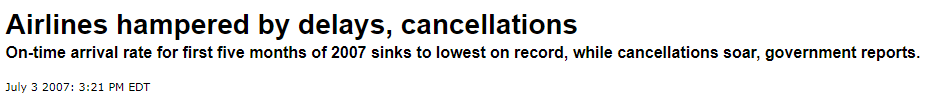

In [ ]:
data.groupby(['year']).sum()[['security_ct']].plot.bar(figsize=(11,6),grid=True)
plt.xticks(rotation = 45);
plt.ylabel('security delays');
plt.title('The number of delayed flight due to secuirty');


the tensest year , due to the security was **2006** and **2007** and you may relate that with the big cancellation number in the **2007** in the previous figure.

### what does effect the delay ?

the **late aircraft** is the most effective reasons in the flight delays 

In [ ]:
corr_data=data.corr()[[' arr_delay']].reset_index().sort_values(by=' arr_delay').drop([0, 1,2,3,4,5,6,7,8,11]).reset_index(drop=True)

corr_data.plot(kind="barh",x='index',y=' arr_delay',grid=True);

plt.title('what effect the flight delay ?');

plt.ylabel('reasons');

plt.xlabel('The R value');

### what are the carrieres changing over time ?

the most delays happened because of the weather usually in the Midyear the **7th** month  and sometimes in the 1st and the 12th month

## Multivariate Exploration


#### how is changing in flights number due year and months ? 

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)});

In [ ]:
sns.scatterplot(data=data,x='year',y='arr_flights',hue=' month');
plt.xlabel('years')
plt.title('changing in flights number due year and months');


 * there was decreasing in the flights number started from 2006 till 2009 ,after that it continued to increase
 
 * in the 2020 there was a small amount of flights number ,and most of the flights happended in the late of the year 
 
 * the dark scatter color suggest that the most flights happens in the late late months of the year 
 

#### what is the relation between different  times type delays ? 

In [ ]:
data.columns

In [ ]:
df=data.drop(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',' arr_delay'],axis=1)

In [ ]:
sns.set(rc={'figure.figsize':(15,10)});

  * we can find that the carrier delay has relation with the late aircraft delay 
    
  * and nas delay with the carrier delay  

  * and the weather delay with the carrier delay 
    

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.title('the relation between delays reasons');


---------------------

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* in rounded 2018 and 2019 it was the biggest era that has the most variety in the carriers and Airports "airline industry started to have more airline carries rounded to 2017" 


* Atlanta, GA is the most crowded airport over the past 16 years then Chicago II then Dallas/Fort Worth.



* the ***southwest airline*** has the biggest number of flight number then ***delta airline*** , and the 3rd is ***american arline***.

    * southwest airline  : there is a decreasing in flight number started in near to 2008 and continued to decrease 

    * expressjet airlines INC : there was a small quit decreasing in delaying since the 2012  

    * american airlines INC: there was a start in increasing since the near to 2015 
    
    ***note** : all the flight numbers had a big decreased regardless to Corona-virus which started in the late of 2019
    
    
 * the ***southwest airline*** has the biggest number of delaying then ***american airline*** , and the 3rd is ***delta     airline***.
 
   * *delta air lines INC : started to decreace in delaying near 2004 except in the 2010 but it countined to decreasing 
  
   * *united air lines INC : started to decrece in near 2008 but it had backed in delaying after that .
   
   * *southwest aitlin CO : has unstable pattern 
  
   * *american airlines INC : started to decrace in  near 2008 .

   * ***note*** : all the flight numbers had a big decreased regardless to Corona
   

* **2007** has a big increase in cancelling flights there an [article](https://money.cnn.com/2007/07/03/news/flight_delays/index.htm) from CNN  was talkin about that case , and there is also the 2020 big increasing in cancellion despite the Coronavirus. 


* the tensest year , due to the security was **2006** and **2007** and you may relate that with the big cancellation number in the **2007** in the previous figure.







### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 

  * the most delays happened because of the weather usually in the Midyear in the **7th** month 

  * the **late aircraft** is the most effective reasons in the flight delays 
  
  * there was decreasing in the flights number started from 2006 till 2009 ,after that it continued to increase
 
  * in the 2020 there was a small amount of flights number ,and most of the flights happended in the late of the year 
 
  * the dark scatter color suggest that the most flights happens in the late late months of the year 
 